In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)

def sigmoidFucntion(z):   
    return 1 / (1 + np.exp(-z))

def cost(theta, x, y):
    h = sigmoidFucntion(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

def Featurefit(x, y, max_iter=100, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)
    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)      
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad           
        thetas.append(theta)
    return thetas, classes, costs

def predictFunction(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoidFucntion(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]

data = np.loadtxt(fname = "D:/Assignment-2_CS5710/UCI_Dataset/pendigits_training.txt")  
                                                                        # satellite_training
                                                                        # yeast_training
                                                                        #pendigits_training
tdata = np.loadtxt(fname = "D:/Assignment-2_CS5710/UCI_Dataset/pendigits_test.txt")  
                                                                        #satellite_test
                                                                        #  yeast_test
                                                                        #pendigits_test

x_train, y_train = data[:, :-1], data[:, -1] 
x_test, y_test = tdata[:, :-1], tdata[:, -1]

thetas, classes, costs = Featurefit(x_train, y_train)
final_thetas = ((thetas[len(thetas)-1]))

print(" Theata values : \n ")
for i in final_thetas:
    print( '%.4f'%i )

def mainfunctiontocall(classes, theta, x, y):
    prediction = predictFunction(classes, theta, x)
    print(prediction[0])
    print (len(y))
    i =0 
    while (i < len(y)):
        if (prediction[i] == y [i]):
            print ("ID= ",i , "Output = ",prediction[i], "True Class = ",y[i] , "Accuracy= ", 1)
        else:
            print ("ID= ",i , "Output = ",prediction[i], "True Class = ",y[i] , "Accuracy= ", 0)
        i = i + 1     
    return  ( prediction == y).mean()

mainfunctiontocall(classes, thetas, x_test, y_test)


[0.5 1. ] 0.0851895021952265
[[-1  0]] 0.09653235263005391
[0.0851895  0.09653235 0.15915494 0.14045374]


C:\Users\basav\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\basav\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\basav\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: covariance is not positive-semidefinite.


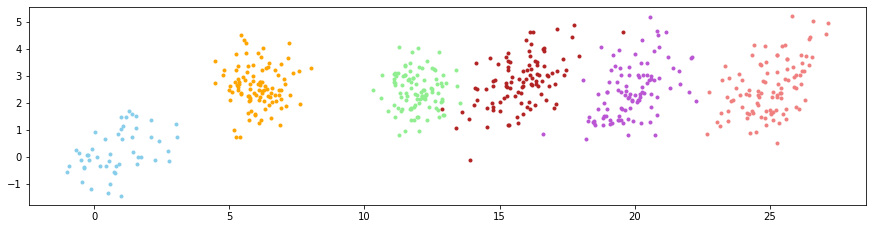

In [143]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


# In[13]:

def multi_norm_pdf_single(x,mu,sigma):
    d=(len(x))
    return (1 / (((2 * math.pi)**d * np.linalg.det(sigma))**0.5) * 
            np.exp(-(np.linalg.solve(sigma, x - mu).T.dot(x - mu)) / 2))

def multi_norm_pdf(x,mu,sigma):
    # return the pdf value(s) of multdimensional data point(s) x 
    # for a normal distribution (mu, sigma)
    if x.ndim == 1:
        return multi_norm_pdf_single(x,mu,sigma)
    elif len(x) == 1:
         return multi_norm_pdf_single(x[0],mu,sigma)
    else:
        return np.array([multi_norm_pdf_single(e,mu,sigma) for e in x])

x = np.array([0.5,1])
#x = np.array([-1,0])
print(x, multi_norm_pdf(x, [0,0], [[1,0],[0,1]])) #[0.5 1. ] 0.0851895021952265

x = np.array([-1,0]).reshape(1,2)
print(x, multi_norm_pdf(x, [0,0], [[1,0],[0,1]])) #[[-1  0]] 0.09653235263005391

x = np.array([[0.5,1], [-1,0],[0,0],[0,0.5]])
print(multi_norm_pdf(x, [0,0], [[1,0],[0,1]])) # [0.0851895  0.09653235 0.15915494 0.14045374]


# In[ ]:


plt.figure(figsize=(15,6))
# Use np.random.multivariate_normal() to generate each group
# Need repeat as many as there are groups with proper parameters
# Use plt.scatter() to draw each group.
#
# Add your code below

mean, cov = [1, 0.5], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 50)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='skyblue');

mean, cov = [6, 2.5], [(0,0.5), (.5, 0)]
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='orange');


mean, cov = [12, 2.5], [(0,0.5), (0.5, 0)]
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='lightgreen');

mean, cov = [16,3], [(0.5,1), (1,0.5)]
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='firebrick');

mean, cov = [20, 2.5], [(1,0.5), (.5,1)]
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='mediumorchid');


mean, cov = [25, 2.5], [(1,0.5), (.5,1)]
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["x", "y"])
plt.plot(df.x, df.y, '.', color='lightcoral');

plt.axis('scaled')

plt.show()



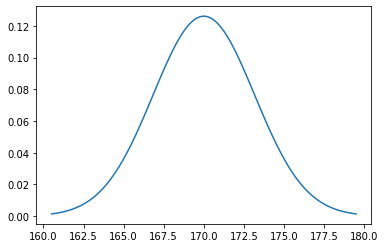

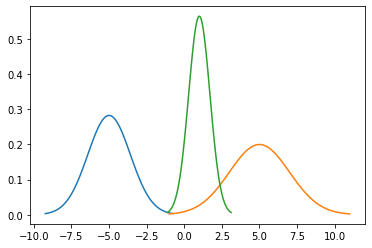

(array([[-5. ,  2. ],
        [ 5. ,  4. ],
        [ 1. ,  0.5]]), None)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def  draw_d1_Gaussians(x):
    mu = x[0]
    variance = x[1] 
    sigma = math.sqrt(variance)
    x = np.linspace( (mu - 3*sigma), (mu + 3*sigma), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    



def d1_norm_pdf(x):
   
    if x.ndim == 1:
        draw_d1_Gaussians(x)
        plt.show()
        
    elif len(x) == 1:
        draw_d1_Gaussians(x[0])
        plt.show()
    else:
        np.array([draw_d1_Gaussians(e) for e in x])
        plt.show()
x=np.array([170,10])
x, d1_norm_pdf(x)
x= np.array([(-5,2),(5,4),(1,0.5)])
x, d1_norm_pdf(x)


In [37]:
def scale(x):
    b=np.std(x)  
    mean =np.mean(x) 
    return ( x-mean )/b

x= np.array([1,2,3])
print (scale(x))
x= np.array([[1,10],[2,20],[3,30]])
print (scale(x))


[-1.22474487  0.          1.22474487]
[[-0.93385921 -0.09338592]
 [-0.84047329  0.84047329]
 [-0.74708737  1.7743325 ]]


In [38]:

import numpy as np
def scale(x):
    std=np.std(x)  
    m =np.mean(x) 
    return ( x-m )/std

x= np.array([1,2,3])
print (scale(x))
x= np.array([[1,10],[2,20],[3,30]])
print (scale(x))

[-1.22474487  0.          1.22474487]
[[-0.93385921 -0.09338592]
 [-0.84047329  0.84047329]
 [-0.74708737  1.7743325 ]]
